# COSC102 - Topic 7 Working with datafiles

In [49]:
# The imports ill need for this notebook
import csv
import math
import matplotlib.pyplot as plt
from sklearn import datasets

## Importing data from a csv file
The data I will be looking at is simple gps co-ordinates of a sheep running around in a field.

In [52]:
# We create two empty lists to store our datas x and y coordinates
x_pos = []
y_pos = []

# Opening the file
with open("sheep.csv", newline='') as file:
    
    # Creating a variable of the reader, passing it the file
    reader = csv.reader(file)
    
    # Iterating through each line of the file and assigning the first
    # element to the x list and the second element to the y list.
    # Casting them to floats to convert them from strings before i forget
    for line in reader:
        # print(line)
        x_pos.append(float(line[0]))
        y_pos.append(float(line[1]))

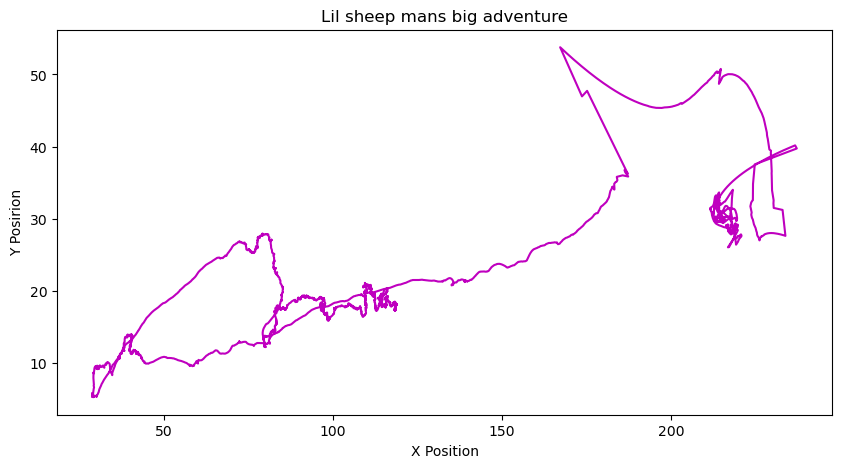

In [68]:
# Now we will create a very simple plot to visualise our data
plt.figure(figsize=(10, 5))
# the m- here is formatting the colour and line style, look here 
#for more https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot
plt.plot(x_pos, y_pos, 'm-')

# set the axis names
plt.title("Lil sheep mans big adventure")
plt.xlabel("X Position")
plt.ylabel("Y Posirion", rotation=90)
plt.show()

## How fast did sheep mans move

Each data point is the sheeps x and y coordinates at a certain point in time. We have been told that the time
per sample is 1 tenth of a second, therefore 10 datapoints make up 1 second. This is important to know when 
we are calculating how fast sheep mans moves in m/sec

In [80]:
# The euclidian distance formula... never heard of it, but we are going to implement it here
# If you have two points, you minus one point from the other in a series, square it, then take
# the squareroot and ta daa... I hope i didnt butcher that, look it up if i did, future me.

# Create a list to store out calculated speed values
sheeps_speed = []

# So our range here is starting at 1 and not 0 as we need to compare one point to another. So we 
# Will start from one point forward in our sequence and compare back to avoid an index error.
# The total length is the set of x_pos values... every value
for t in range(1,len(x_pos)):
    # Breaking the next step up into smaller steps, even though it could be done in one line.

    # First we calculate the difference between the point prior and the current point
    difference = (x_pos[t-1] - x_pos[t]) + (y_pos[t-1] - y_pos[t])

    # Now we square that difference
    square_difference = difference**2

    # And then take the square root
    sqrt = math.sqrt(square_difference)

    # Time it by 10 since each sample is 1 tenth of a second.
    distance = sqrt*10

    # Append the result to the list 
    sheeps_speed.append(distance)

# print(sheeps_speed)

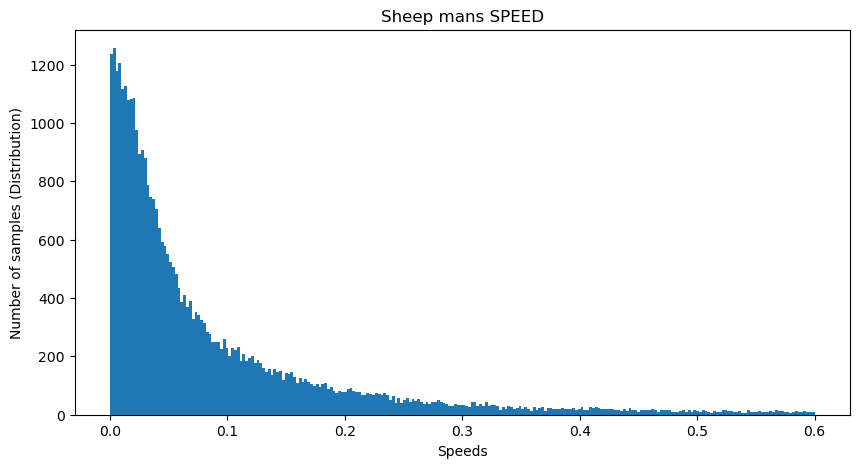

In [122]:
# Next we plot the data to see the sheeps speed, we are using a histogram

plt.figure(figsize=(10,5))

# Bins specify how many sections the data should be split into.... kinda 
# Range (the x axis here) specifies to upper and lower bounds of the x axis.... kinda... read more here.
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib.axes.Axes.hist
plt.hist(sheeps_speed, bins=250, range=[0, 0.6])
plt.title("Sheep mans SPEED")
plt.xlabel("Speeds")
plt.ylabel("Number of samples (Distribution)", rotation=90)
plt.show()

## Exporting data from a csv file

The dataset below comes from the sklearn module that was imported at the beginning of this notebook
and the below code is just a refresher/reminder of how to export a datastructure to a csv.

In [137]:
# Create a variable for the iris dataset that sits in sklearn
iris = datasets.load_iris()

# print(iris)

# We now open our csv we want to write too
with open("iris_dataset.csv", "w", newline='') as file:
    # Creating a writer object 
    writer = csv.writer(file)

    # Append the headings to the csv file, this is auto stored in feature_names
    # in sklearn as, once again this is a build in sklearn dataset, this isnt the 
    # same for my own data
    writer.writerow(iris.feature_names)

    for row in iris.data:
        writer.writerow(row)

# Now we try open the csv to check it was stored correctly
with open("iris_dataset.csv", newline='') as file:
    reader = csv.reader(file)

    # for line in reader:
    #     print(line)

# It indeed works

In [147]:
# Extra exercise: Write only the first two columns of the iris dataset to a csv

with open("iris_two_column.csv", "w", newline="") as file:
    writer = csv.writer(file)

    # This will write only the first two columns headings to our file
    writer.writerow([iris.feature_names[0], iris.feature_names[1]])

    # This will write only the first two columns
    for row in iris.data:
        writer.writerow([row[0],row[1]])
